# Tutorial things for SKLearn, Numpy, Numba etc.

In [1]:
import timeit
import numpy as np
# import julia

def mean(numbers: list):
    return sum(numbers)/len(numbers)

numbers = np.random.random(1_000_000) #list(range(1_000_000))
%timeit np.mean(numbers)

# %timeit mean(numbers) #standard implementation
# 37.2 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 35 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# %timeit np.mean(numbers) #numpy implementation
# 2.23 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# 2.38 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# 2.41 ms ± 70.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

def plot_digit(data, labels, index):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.imshow(data[index].reshape(8,8), cmap=plt.cm.gray_r)
    axes.set_title(f"{labels[index]} (index {index})")
    return

1.9 ms ± 32.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [2]:
import pandas as pd
import numpy as np
import cufflinks
cufflinks.go_offline()

times = ["05:01","05:32","05:33","05:35","05:36","05:38","05:39","05:40","05:41","05:42","05:45","05:46","05:47","05:48","05:50","05:51","05:52","05:53","05:54","05:57","05:58","06:02","06:03","06:04",
         "06:05","06:07","06:08","06:09","06:10","06:13","06:15","06:16","06:17","06:19","06:20","06:21","06:22","06:25","06:26","06:27","06:28","06:29","06:31","06:32","06:33","06:35","06:36","06:39",
         "06:40","06:41","06:44","06:45","06:46","06:47","06:50","06:51","06:56","06:57","06:59","07:00","07:01","07:02","07:05","07:08","07:12","08:15","08:19","08:20","08:21","08:22","08:25","08:26",
         "08:27","08:28","08:34","08:35","08:36","08:37","08:38","08:40","08:41","08:44","08:45","09:58","09:59","10:01","10:02","10:03","10:06","10:07","10:08","10:09","10:15","10:16","10:17","10:20",
         "10:21","10:22","10:23","10:30","10:31","10:32","10:33","10:34","10:36","10:37","10:40","10:41","10:42","10:43","10:44","11:46","11:47","11:48","11:49","11:50","12:40","12:41","12:42","12:43",
         "12:44","12:45","12:46","12:47","12:48","13:06","13:07","13:08","13:09","13:10","13:16","13:17","13:18","14:03","14:04","14:05","14:08","14:09","14:10","14:11","14:12","14:13","14:14","14:48",
         "14:50","14:52","14:53","14:54","14:55","14:56","14:57","15:56","15:57","15:58","15:59","16:00","16:01","16:02","16:03","16:05","16:06","16:07","16:08","16:11","16:12","16:13","16:14","16:15",
         "16:16","16:17","16:18","16:19","16:20","16:21","16:23","16:24","16:25","16:28","16:29","16:30","16:31","16:32","16:49","16:50","16:51","17:00","17:01","17:02","17:19","17:20","17:21","17:22",
         "17:24","17:25","17:26","17:27","17:28","17:29","18:48","18:49","18:50","18:52","18:53","18:54","18:55","18:56","18:57","18:58","18:59"]
df = pd.DataFrame({"production":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,14,0,23,31,0,45,0,5,0,4,62,65,68,80,0,40,50,30,45,98,107,110,111,114,117,123,125,128,133,136,144,146,149,157,159,162,164,172,65,61,54,
                                 31,39,199,200,209,216,225,361,368,370,372,374,201,156,0,54,67,95,2,15,36,237,354,145,221,40,50,123,342,4,169,86,245,402,387,435,264,513,498,476,515,555,460,557,558,559,
                                 561,562,348,456,566,567,568,301,450,245,568,553,534,423,314,562,620,431,487,345,615,345,42,35,0,14,544,25,120,135,452,512,387,214,201,169,154,225,592,123,0,30,0,45,0,0,
                                 460,460,350,240,130,249,289,231,198,230,476,475,344,321,256,156,231,466,123,32,438,437,134,324,412,398,314,356,241,175,221,321,52,145,35,54,145,350,310,254,178,309,145,
                                 101,59,201,305,240,80,74,25,89,130,110,122,45,124,123,63]},
                  index=[f"2024-08-10 {t}" for t in times])
df.index = pd.to_datetime(df.index)
df = df.reindex(pd.date_range("2024-08-10 05:00:00","2024-08-10 21:00:00",freq="1min"))
a = 0.5
b = 240

def parabola_index(index: pd.Index, a: float, b: float, xt: pd.Timestamp, res: str = "15min"):
    index = pd.to_datetime(index)
    s,e = index.values[0],index.values[-1]
    xt = pd.Timestamp(xt)
    if xt < s or xt > e:
        raise ValueError("xt must be in between start and end of index")
    shifted_index = (index - xt) / pd.to_timedelta(res)
    return a*(shifted_index.values**2) + b
# print(df.index.values)
# print(parabola_index(df.index, -0.5, 240, "2024-08-10 12:45:00"))
df["parabola"] = np.fmax(parabola_index(df.index, -0.8, 620, "2024-08-10 12:45:00"), 0)
df.loc["2024-08-10 08:46:00":"2024-08-10 09:57:00","production"] = df.loc["2024-08-10 08:46:00":"2024-08-10 09:57:00","parabola"]
df.loc["2024-08-10 10:45:00":"2024-08-10 11:45:00","production"] = 0
df.loc["2024-08-10 11:51:00":"2024-08-10 12:39:00","production"] = df.loc["2024-08-10 11:51:00":"2024-08-10 12:39:00","parabola"]
df.loc["2024-08-10 12:51:00":"2024-08-10 13:05:00","production"] = df.loc["2024-08-10 12:51:00":"2024-08-10 13:05:00","parabola"]
df.loc["2024-08-10 13:11:00":"2024-08-10 13:15:00","production"] = df.loc["2024-08-10 13:11:00":"2024-08-10 13:15:00","parabola"]
df.loc["2024-08-10 13:19:00":"2024-08-10 13:29:00","production"] = 0
df.loc["2024-08-10 13:30:00":"2024-08-10 14:02:00","production"] = df.loc["2024-08-10 13:30:00":"2024-08-10 14:02:00","parabola"]
df.loc["2024-08-10 14:15:00":"2024-08-10 14:47:00","production"] = df.loc["2024-08-10 14:15:00":"2024-08-10 14:47:00","parabola"]
df.loc["2024-08-10 14:58:00":"2024-08-10 15:55:00","production"] = df.loc["2024-08-10 14:58:00":"2024-08-10 15:55:00","parabola"]
df.loc["2024-08-10 16:33:00":"2024-08-10 16:48:00","production"] = df.loc["2024-08-10 16:33:00":"2024-08-10 16:48:00","parabola"]
df.loc["2024-08-10 16:52:00":"2024-08-10 16:59:00","production"] = 0
df.loc["2024-08-10 17:03:00":"2024-08-10 17:18:00","production"] = df.loc["2024-08-10 17:03:00":"2024-08-10 17:18:00","parabola"]
df.loc["2024-08-10 17:30:00":"2024-08-10 18:47:00","production"] = df.loc["2024-08-10 17:30:00":"2024-08-10 18:47:00","parabola"]
df.loc["2024-08-10 19:00:00":"2024-08-10 21:00:00","production"] = df.loc["2024-08-10 19:00:00":"2024-08-10 21:00:00","parabola"]
df["is_hourly_max"] = 1
minutes = 64
df["is_hourly_max2"] = df["production"].rolling(f"{minutes}min").max().shift(freq=f"-{minutes-1}min")
df.loc[(df["production"].rolling(f"{minutes}min").max() != df["production"]) & (df["is_hourly_max2"] != df["production"]), "is_hourly_max"] = np.nan
df.drop(columns=["parabola","is_hourly_max2"], inplace=True)
df["uncurtailed_production"] = (df["is_hourly_max"] * df["production"]).interpolate("linear")
df.iplot()

In [116]:
import plotly.graph_objects as go
import plotly.express as px
from sklearn import linear_model

df_waveforms = pd.DataFrame({"Waveform1":[0.0000,0.2321,0.6734,0.9032,0.9998],
                             "Waveform2":[0.0001,0.1013,0.3512,0.7365,1.0000],
                             "Waveform3":[0.0012,0.0594,0.5437,0.8563,1.0002],
                             "Waveform4":[0.0007,0.1882,0.4210,0.8005,0.9989],
                             "Waveform5":[0.0000,0.0217,0.1345,0.4332,0.9999],
                             "Waveform6":[0.0003,0.0773,0.2402,0.6416,0.9999],
                             "Waveform7":[-0.0001,0.0348,0.2839,0.7114,1.0001],
                            }, index=[0,20,40,60,80])
df_waveforms.iplot(theme="white",mode = 'lines+markers', size  = 5)
x,y,z = df_waveforms.iloc[1:4].to_dict("split")["data"]
df_waveforms = df_waveforms.set_index(pd.Series(["0","x","y","z","1"])).transpose()
df_waveforms["size"] = 0.4
fig = px.scatter_3d(df_waveforms, x="x", y="y", z="z", size="size")

# barycenter of the points
# compute centered coordinates
coords = np.array([[xi,yi,zi] for xi,yi,zi in zip(x,y,z)])
G = coords.sum(axis=0) / coords.shape[0]

# run SVD
u, s, vh = np.linalg.svd(coords - G)

# unitary normal vector
a,b,n = u_norm = vh[2, :]
# print(u_norm)

# Definition of the domain
x_ = np.linspace(min(x), max(x), 100)
y_ = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_, y_)
# print(G)
d = a * G[0] + b * G[1] + n * G[2]#-0.45
# print(d)
Z = d/n - a/n * X -b/n * Y

fig.show(style="white")
# Add the y = x plane to the plot
fig.add_trace(go.Surface(z=Z, x=X, y=Y, opacity=0.5))

# x_end = [1, 2, 2]
# y_end = [3, 5, 4]
# x_start = [0, 1, 3]
# y_start = [4, 4, 4]

# list_of_all_arrows = []
# for x0,y0,x1,y1 in zip(x_end, y_end, x_start, y_start):
#     arrow = go.layout.Annotation(dict(
#                     x=x0,
#                     y=y0,
#                     xref="x", yref="y",
#                     text="",
#                     showarrow=True,
#                     axref="x", ayref='y',
#                     ax=x1,
#                     ay=y1,
#                     arrowhead=3,
#                     arrowwidth=1.5,
#                     arrowcolor='rgb(255,51,0)',)
#                 )
#     list_of_all_arrows.append(arrow)

# fig.update_layout(annotations=list_of_all_arrows)
# fig.write_html("Fig.html")
fig.show(style="white")

In [38]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
data = digits["data"]
print("data:\n",data)
print("shape:",data.shape)
print("first and second digit:\n", data[0:2])
print("first and second digit, first 10 pixels:\n", data[0:2, :10])
labels = digits["target"]
# display(labels)

data:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
shape: (1797, 64)
first and second digit:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
first and second digit, first 10 pixels:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.]]


In [15]:
from sklearn.decomposition import PCA

n_components = 2

model = PCA(n_components)
data_trans = model.fit_transform(data)

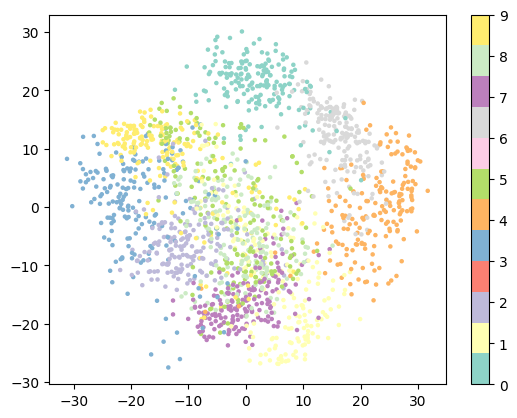

In [16]:
# plot_digit(data, labels, 412)

def plot_transform(transformed_data, n_components):
    plt.scatter(data_trans[:, 0],
                data_trans[:, 1],
                s=5,
                c=labels,
                cmap=plt.cm.Set3) if n_components == 2 else (
        plt.scatter(data_trans[:, 0],
                    data_trans[:, 1],
                    data_trans[:, 2],
                    c=labels,
                    cmap=plt.cm.Set3) if n_components == 3 else print("Number of components must be 2 or 3"))
    plt.colorbar()

plot_transform(data_trans, n_components)

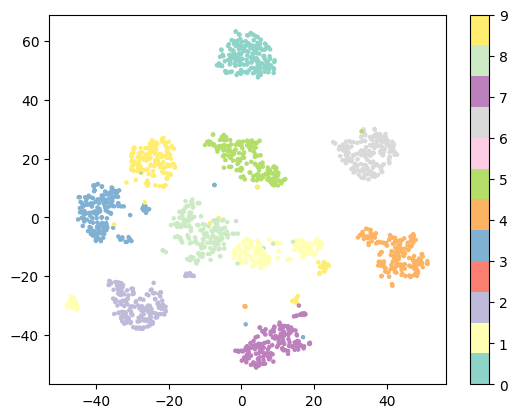

In [17]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2)
data_trans = model.fit_transform(data)

plot_transform(data_trans, 2)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Support Vector Classifier

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3)

model = SVC(C=1, gamma=0.001)

# training model
model.fit(data_train, labels_train)

SVC(C=1, gamma=0.001)

In [19]:
# predict training data
prediction_train = model.predict(data_train)
prediction_test = model.predict(data_test)

0.9976133651551312
0.9851851851851852


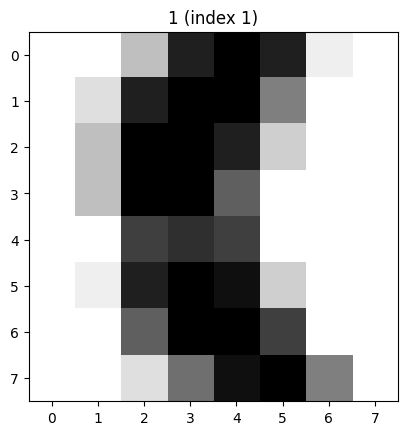

In [20]:
plot_digit(data_train, prediction_train, 1)
print((prediction_train == labels_train).mean())
print((prediction_test == labels_test).mean())

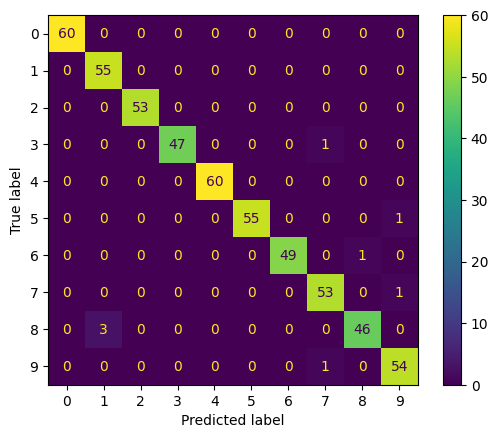

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, data_test, labels_test)

In [106]:
from sklearn.neural_network import MLPClassifier

MLPClassifier()

MLPClassifier()

In [ ]:
# Waveform fitting old stuffs

# Generalised logistic function
logfunc = lambda t, B, v, t_0: (1+np.exp(-B*(t-t_0)))**(-1/v)
logfunc_127 = lambda t, B, v, t_0: (1+np.exp(-B*(t/127-t_0)))**(-1/v)
t_0_shift = lambda B, v, xy_tup: xy_tup[0] + np.log(xy_tup[1]**(-v) - 1) / B
logfunc_xy = lambda t, B, v, xy_tup: (1+np.exp(-B*(t-t_0_shift(B, v, xy_tup))))**(-1/v)

col_for_str = lambda df, col: [c for c in df.columns if col in c][0]
# waveform = lambda df: {f"[{cn}]": df[col_for_colnum(df, cn)] for cn in range(len(df.columns))}
colcontains = lambda df, contains: df[col_for_str(df, contains)]
# t_0_shift = lambda B, v: 0.5 + math.log(0.5**(-v) - 1) / B

df = get_waveforms(3,5, source_data=data0)
for col in df.columns:
    df[col+" slope"] = df[col].diff()
#3
df["Logfunc3"] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)]
# df["Logfunc3_0"] = [logfunc_xy(t/127, 5, 0.1, (60/127,0.512045)) for t in range(0,128)]
#4
df["Logfunc4"] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
# df["Logfunc4_0"] = [logfunc_xy(t/127, 7.2, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)]
df["Noise3"] = colcontains(df, "[3]") - df["Logfunc3"]
df["Noise4"] =colcontains(df, "[4]") - df["Logfunc4"]
square_sum = lambda series: (series*series).sum()
print(square_sum(df["Noise3"]),square_sum(df["Noise4"]))
#[["Noise3", "Noise4"]]
df.iplot(title="Example waveforms from the data")


# Try finding regression parameters using SciPy model fit

x_data = np.arange(0,128)
waveform = [3]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)
y_data = wave_df[imap[waveform[0]]]
B0, v0, x0, y0 = 4, 0.001, 60, y_data[60]
print(B0, v0, x0, y0, "timeshift", t_0_shift(B0, v0, (x0, y0)))



# plt.plot(x_data, y_data, 'b-', label='data with noise')

popt, pcov = curve_fit(logfunc_127, x_data, y_data, bounds=([0., 0.0001, -0.8], [10., 1., 0.8]))
print(popt, pcov)

# plt.plot(x_data, func(x_data, *popt), 'g--',
#          label='fit: a=%5.3f, b=%5.3f, c=%5.7f' % tuple(popt))
wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)] = logfunc_127(x_data, *popt)
wave_df['original fit'] = [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)] #[3]
# wave_df['original fit'] = [logfunc_xy(t/127, 7, 0.001, (60/127,0.632591-0.02)) for t in range(0,128)] #[4]
wave_df["Noise original fit"] = colcontains(wave_df,str(waveform)) - wave_df['original fit']
wave_df["Noise fit"] = colcontains(wave_df,str(waveform)) - wave_df[str(waveform)+' fit: B=%5.3f, v=%5.3f, t_0=%5.3f' % tuple(popt)]
print("New fit:", square_sum(wave_df["Noise fit"]), "Original fit:", square_sum(wave_df["Noise original fit"]))
print("New fit:", np.sqrt(square_sum(wave_df["Noise fit"]))/128, "Original fit:", np.sqrt(square_sum(wave_df["Noise original fit"]))/128)

fig = wave_df.iplot(asFigure=True)
print(t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])))
fig.add_vline(x=t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])), line_color="orange")

# plt.plot(x_data, [logfunc_xy(t/127, 5.2, 0.00001, (60/127,0.512045)) for t in range(0,128)], 'r-', label='original fit')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

# DOESNT OPTIMIZE :((
# params = curve_fit(logfunc_127, x_data, y_data, p0 = [B0, v0, t_0_shift(B0, v0, (x0, y0))], bounds=([0., 0.1, -0.5], [10., 1., 60.0]))
# print(params)
# least_squares(logfunc, x0 = , )

# ['[190]', '[528]', '[536]', '[715]', '[1035]', '[1536]', '[1780]', '[2111]',       <---- Pathologic waveforms
# '[2278]', '[2581]', '[2759]', '[2927]', '[3017]', '[3605]', '[3704]', '[3812]', 
# '[4066]', '[4658]', '[4797]', '[5517]', '[5633]', '[5677]', '[5777]', '[6085]',
# '[6250]', '[6261]', '[6755]', '[6887]', '[7023]', '[7038]', '[7674]', '[7827]',
# '[8129]', '[8573]', '[9606]', '[9608]', '[10356]', '[10550]', '[10626]', '[10686]',
# '[10979]', '[11017]', '[11915]', '[12050]', '[12141]', '[12251]', '[12306]', '[12655]',
# '[12879]', '[13504]', '[13977]', '[14159]', '[14345]', '[14598]', '[14758]', '[14854]',
# '[15700]', '[15798]', '[15841]', '[16000]', '[16100]', '[16181]', '[16403]', '[16595]',
# '[16909]', '[18015]', '[18074]', '[18409]', '[18648]']
waveform = [4066]
wave_df, imap = get_waveforms(waveform, source_data=data0, get_indices_map=True)

part = wave_df[wave_df[imap[waveform[0]]] <= 0.2][imap[waveform[0]]]
x_data = np.arange(0,len(part))
y_data = part
b_exp = lambda x, b, x_0: b**(x-x_0)
c_par = lambda x, a, x_0: a * (max(x - x_0,0))**2
c_par_arr = lambda x, a, x_0: np.array([c_par(x_,a,x_0) for x_ in x])

# Exp fit
popt, pcov = curve_fit(b_exp, x_data, y_data, bounds=([0.1, -10], [10, 70]))
print(popt, pcov)
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: b=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = b_exp(x_data, *popt)
# Parabola fit
popt, pcov = curve_fit(c_par_arr, x_data, y_data, bounds=([-3, -10], [3, 40]))
print(popt)
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)] = np.nan
wave_df['fit: a=%5.3f x_0=%5.3f' % tuple(popt)].iloc[:len(part)] = c_par_arr(x_data, *popt)
# wave_df['manual fit'] = b_exp(np.arange(0,len(wave_df)), 1.17, 47)
fig2 = wave_df.iplot(asFigure=True)
fig2.add_vline(x=t_to_x(float([s[s.find("]")+1:s.find("dT")] for s in [col_for_str(wave_df, str(waveform)).replace(" ","")]][0])), line_color="orange")